In [608]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from PyPDF2 import PdfReader
import re
import os
import string
from unidecode import unidecode

In [609]:
#Obtendo os currículos e os colocando numa lista.
diretório = 'curriculos'
curriculos = []
for filename in os.listdir(diretório):
    curriculo_path = os.path.join(diretório, filename)

    reader = PdfReader(curriculo_path)
    text = []
    for page in reader.pages:
        text.append(page.extract_text())
    text = " ".join(text)
    curriculos.append(text)
    
print(curriculos[10])

Nome: Ana Silva  
Idade: 18 anos  
Objetivo: Oportunidade de trabalho em área  administrativa.  
Formação:  
Ensino Médio Completo - Escola Estadual São Paulo (2018 -2021)  
Experiência Profissional:  
Atendente de Lanchonete - Lanchonete São João (jan/2022 - atualmente)  
Atendimento ao cliente;  
Preparação de lanches e bebidas;  
Manutenção da limpeza e organização do ambiente.  
Habilidades:  
Habilidade em lidar com clientes;  
Boa comunicação oral e escrita;  
Organização e facilidade em trabalhar em equipe;  
Conhecimento básico em informática.  
Regime de trabalho: Presencial ou híbrido.  


### Análise exploratória dos dados

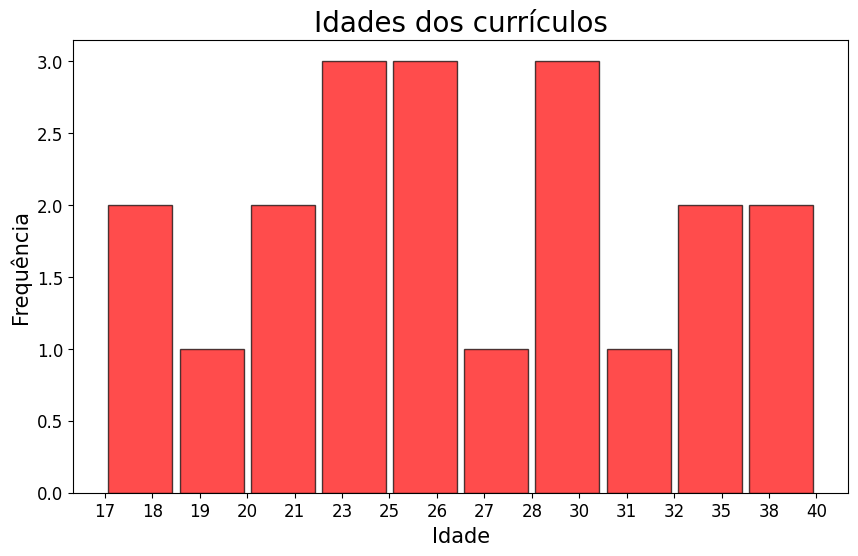

In [610]:
import re
import matplotlib.pyplot as plt

padrao = r"\b(\d{1,2})\sanos?\b"
idades =[]
for curriculo in curriculos:
    match = re.search(padrao, curriculo)
    if match:
        idades.append(match.group(1))
idades = sorted(idades)

plt.figure(figsize=(10, 6), dpi=100)
plt.title('Idades dos currículos', fontsize=20)
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Frequência', fontsize=15)
plt.tick_params(labelsize=12)
plt.hist(idades, rwidth=0.9, color='red', alpha=0.7, edgecolor='black')
plt.show()


### Pré-processamento do texto

In [611]:
#Pre-processamento do texto

#LowerCase
curriculos = [curriculo.lower() for curriculo in curriculos]

# Remoção de pontuação e símbolos
# Tabela de pontuação
punctuation = string.punctuation
# Criar tabela de tradução que susbstituirá toda pontuação por um espaço em branco
trantab = str.maketrans(punctuation, len(punctuation)*' ')
# Traduzir nosso exemplo
curriculos = [curriculo.translate(trantab) for curriculo in curriculos]

# Remover caracteres especiais (acentos e afins)
curriculos = [unidecode(curriculo) for curriculo in curriculos]

print(curriculos[10])


nome  ana silva  
idade  18 anos  
objetivo  oportunidade de trabalho em area  administrativa   
formacao   
ensino medio completo   escola estadual sao paulo  2018  2021   
experiencia profissional   
atendente de lanchonete   lanchonete sao joao  jan 2022   atualmente   
atendimento ao cliente   
preparacao de lanches e bebidas   
manutencao da limpeza e organizacao do ambiente   
habilidades   
habilidade em lidar com clientes   
boa comunicacao oral e escrita   
organizacao e facilidade em trabalhar em equipe   
conhecimento basico em informatica   
regime de trabalho  presencial ou hibrido   


In [612]:
#Pre-processamento do texto

#Preparar para remoção de stopwords e radicalização
curriculos = [curriculo.split() for curriculo in curriculos]
print(curriculos[10])

['nome', 'ana', 'silva', 'idade', '18', 'anos', 'objetivo', 'oportunidade', 'de', 'trabalho', 'em', 'area', 'administrativa', 'formacao', 'ensino', 'medio', 'completo', 'escola', 'estadual', 'sao', 'paulo', '2018', '2021', 'experiencia', 'profissional', 'atendente', 'de', 'lanchonete', 'lanchonete', 'sao', 'joao', 'jan', '2022', 'atualmente', 'atendimento', 'ao', 'cliente', 'preparacao', 'de', 'lanches', 'e', 'bebidas', 'manutencao', 'da', 'limpeza', 'e', 'organizacao', 'do', 'ambiente', 'habilidades', 'habilidade', 'em', 'lidar', 'com', 'clientes', 'boa', 'comunicacao', 'oral', 'e', 'escrita', 'organizacao', 'e', 'facilidade', 'em', 'trabalhar', 'em', 'equipe', 'conhecimento', 'basico', 'em', 'informatica', 'regime', 'de', 'trabalho', 'presencial', 'ou', 'hibrido']


In [613]:
#Pre-processamento do texto

#Remover stopwords
try:
    stopwords_list = stopwords.words('portuguese')
except:
    nltk.download('stopwords')
    stopwords_list = stopwords.words('portuguese')

for index, curriculo in enumerate(curriculos):
    curriculo = [palavra for palavra in curriculo if (palavra not in stopwords_list) and len(palavra) > 1]
    curriculos[index] = curriculo
print(curriculos[10])

['nome', 'ana', 'silva', 'idade', '18', 'anos', 'objetivo', 'oportunidade', 'trabalho', 'area', 'administrativa', 'formacao', 'ensino', 'medio', 'completo', 'escola', 'estadual', 'sao', 'paulo', '2018', '2021', 'experiencia', 'profissional', 'atendente', 'lanchonete', 'lanchonete', 'sao', 'joao', 'jan', '2022', 'atualmente', 'atendimento', 'cliente', 'preparacao', 'lanches', 'bebidas', 'manutencao', 'limpeza', 'organizacao', 'ambiente', 'habilidades', 'habilidade', 'lidar', 'clientes', 'boa', 'comunicacao', 'oral', 'escrita', 'organizacao', 'facilidade', 'trabalhar', 'equipe', 'conhecimento', 'basico', 'informatica', 'regime', 'trabalho', 'presencial', 'hibrido']


In [614]:
#Pre-processamento do texto

#Radicalização
nltk.download('rslp', quiet=True)
porter = nltk.stem.RSLPStemmer()
for index, curriculo in enumerate(curriculos):
    curriculo = " ".join([porter.stem(palavra) for palavra in curriculo])
    curriculos[index] = curriculo
print(curriculos[10])

nom ana silv idad 18 ano obje oportun trabalh are administr formaca ensin medi complet escol estad sao paul 2018 2021 experienc profiss atend lanchonet lanchonet sao joa jan 2022 atual atend client preparaca lanch beb manutenca limp organizaca ambi habil habil lid client boa comunicaca oral escrit organizaca facil trabalh equip conhec basic informa regim trabalh presenc hibr
